# Assignment 4: Decision Trees and Ensemble Methods

<mark> Ethan Wen - Professor Mishra - 02/27/2022 </mark>

This assignment is updated with an Ablation Test from the past assignment, Assignment 3: Logisitic Regression and SVMs. 

From Kaggle, we will be using data about Mount Rainier Weather and Climbing. The assingment asks us to develop a mobile application to determine whether one should climb Mount Rainier based on a set of features. 

The features are: Battery Voltage AVG, Temperature AVG, Relative Humidity AVG, Wind Speed Daily AVG, Wind Direction AVG, Solar Radiation AVG, and Route. 

The outputs that we are trying to predict would be the column called **'Succeeded'**. 

Our output would be determined as either **0 or 1** which would stand for **don't hike and hike** Mt. Rainer respectively. 

## 1. Feature Engineering 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
mtrainier_df = pd.read_csv("MtRainier_data.csv")
print (f"Shape of data {mtrainier_df.shape}")


Shape of data (1895, 10)


As we can see here, the original dataset holds **10** columns and contains **1895** rows. The following code will try to find duplicates and drop columns that have missing data in one of their columns to make a better model. 

In [3]:
mtrainier_df = mtrainier_df.drop_duplicates()

mtrainier_df = mtrainier_df.dropna()
print (f"Shape of data {mtrainier_df.shape}")
mtrainier_df.head()

Shape of data (1895, 10)


,Unnamed: 0,Date,Route,Succeeded,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,0,11/27/2015,Disappointment Cleaver,0,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250
1,1,11/21/2015,Disappointment Cleaver,0,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417
2,2,10/15/2015,Disappointment Cleaver,0,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000
3,3,10/13/2015,Little Tahoma,0,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667
4,4,10/9/2015,Disappointment Cleaver,0,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292


It seems like we have the same amount of rows so all of these data entries seem to be non-duplicates and aren't missing any data. However, there is an 'Unnamed' Section that replicates our index. 

In [4]:
mtrainier_df.columns

Index(['Unnamed: 0', 'Date', 'Route', 'Succeeded', 'Battery Voltage AVG',
       'Temperature AVG', 'Relative Humidity AVG', 'Wind Speed Daily AVG',
       'Wind Direction AVG', 'Solare Radiation AVG'],
      dtype='object')

In [5]:
mtrainier_df.pop("Unnamed: 0")
mtrainier_df.head()

0          0
1          1
2          2
3          3
4          4
        ... 
1890    1890
1891    1891
1892    1892
1893    1893
1894    1894
Name: Unnamed: 0, Length: 1895, dtype: int64

,Date,Route,Succeeded,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,11/27/2015,Disappointment Cleaver,0,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250
1,11/21/2015,Disappointment Cleaver,0,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417
2,10/15/2015,Disappointment Cleaver,0,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000
3,10/13/2015,Little Tahoma,0,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667
4,10/9/2015,Disappointment Cleaver,0,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292


One thing that I am confused about is the use of date as a feature or if its just useless. The other features seem to be more related to the prediction of a trip to Mt. Rainier being successful. For now, I will probably just use date as an index instead since we don't need it. 

Most of our features seem to be numerical: Battery Voltage AVG, Temperature AVG, Relative Humidity AVG, Wind Speed Daily AVG, Wind Direction AVG,and Solare Radiation AVG. However, Route and Succeeded are both categorical data. 'Route' is a **categorical nominal variable** since its talking about different summit routes while 'Succeeded' could be a **categorical nominal binary variable** since its talking about two different outcomes - not hiking and hiking - which are related to each other in order. 

In [6]:
mtrainier_labels_df = pd.DataFrame(mtrainier_df[["Succeeded"]])
mtrainier_df.pop("Succeeded")
mtrainier_dates_df = pd.DataFrame(mtrainier_df.pop("Date")) #I don't think we need it but I'll save it. 
mtrainier_features_df = mtrainier_df
mtrainier_features_df.head()

0       0
1       0
2       0
3       0
4       0
       ..
1890    0
1891    1
1892    1
1893    0
1894    0
Name: Succeeded, Length: 1895, dtype: int64

,Route,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,Disappointment Cleaver,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250
1,Disappointment Cleaver,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417
2,Disappointment Cleaver,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000
3,Little Tahoma,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667
4,Disappointment Cleaver,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292


Before scaling, we need to deal with the **categorical nominal variable - Route**. Since its a categorical nominal variable, I will use one-hot encoding. 

In [7]:
route_list = mtrainier_features_df["Route"].to_list()
print(route_list[:5])

['Disappointment Cleaver', 'Disappointment Cleaver', 'Disappointment Cleaver', 'Little Tahoma', 'Disappointment Cleaver']


In [8]:
set(route_list)

{'Curtis RIngraham Directge',
 'Disappointment Cleaver',
 'Emmons-Winthrop',
 "Fuhrer's Finger",
 'Fuhrers Finger',
 'Gibralter Chute',
 'Gibralter Ledges',
 'Ingraham Direct',
 'Kautz Cleaver',
 'Kautz Glacier',
 'Liberty RIngraham Directge',
 'Little Tahoma',
 'Mowich Face',
 'Nisqually Glacier',
 'Ptarmigan RIngraham Directge',
 'Success Cleaver',
 'Sunset RIngraham Directge',
 'Tahoma Cleaver',
 'Tahoma Glacier',
 'Unknown',
 'Wilson Headwall',
 'glacier only - no summit attempt'}

In [9]:
route_list_of_lists = []

for i in route_list: 
    route_list_of_lists.append([i])

print(route_list_of_lists[:5])

[['Disappointment Cleaver'], ['Disappointment Cleaver'], ['Disappointment Cleaver'], ['Little Tahoma'], ['Disappointment Cleaver']]


In [10]:
from sklearn.preprocessing import OneHotEncoder

route_encoder = OneHotEncoder()

route_encoder.fit(route_list_of_lists)

print(f"Unique vocabulary items {len(route_encoder.categories_[0])}\n")

route_transformed = route_encoder.transform(route_list_of_lists)

route_transformed = route_transformed.toarray()

print(route_transformed)

OneHotEncoder()

Unique vocabulary items 22

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
type(route_transformed)

numpy.ndarray

In [12]:
route_transformed_df = pd.DataFrame(route_transformed)

Instead of replacing the labels one by one, I will use the method that I implemented in Assignment 2 to replace the column names.

In [13]:
temp_list = []
for i in range(len(route_transformed_df.columns)):
    temp = list(route_transformed_df[i])
    temp_list.append(temp.index(1.0))

In [14]:
route_name_list = []
for i in temp_list:
    route_name_list.append(mtrainier_features_df["Route"][i])
print(route_name_list)

['Curtis RIngraham Directge', 'Disappointment Cleaver', 'Emmons-Winthrop', "Fuhrer's Finger", 'Fuhrers Finger', 'Gibralter Chute', 'Gibralter Ledges', 'Ingraham Direct', 'Kautz Cleaver', 'Kautz Glacier', 'Liberty RIngraham Directge', 'Little Tahoma', 'Mowich Face', 'Nisqually Glacier', 'Ptarmigan RIngraham Directge', 'Success Cleaver', 'Sunset RIngraham Directge', 'Tahoma Cleaver', 'Tahoma Glacier', 'Unknown', 'Wilson Headwall', 'glacier only - no summit attempt']


In [15]:
route_transformed_df.columns = route_name_list

In [16]:
route_transformed_df.head()

,Curtis RIngraham Directge,Disappointment Cleaver,Emmons-Winthrop,Fuhrer's Finger,Fuhrers Finger,Gibralter Chute,Gibralter Ledges,Ingraham Direct,Kautz Cleaver,Kautz Glacier,...,Mowich Face,Nisqually Glacier,Ptarmigan RIngraham Directge,Success Cleaver,Sunset RIngraham Directge,Tahoma Cleaver,Tahoma Glacier,Unknown,Wilson Headwall,glacier only - no summit attempt
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
print(route_transformed_df.shape)
print(mtrainier_features_df.shape)

(1895, 22)
(1895, 7)


In [18]:
mtrainier_features_df['Route'].head()

0    Disappointment Cleaver
1    Disappointment Cleaver
2    Disappointment Cleaver
3             Little Tahoma
4    Disappointment Cleaver
Name: Route, dtype: object

It matches up so we can put this back to the original dataframe. 

In [19]:
mtrainier_features_df.reset_index(drop=True, inplace=True)
route_transformed_df.reset_index(drop=True, inplace=True)

mtrainier_features_final_df = pd.concat([mtrainier_features_df, route_transformed_df], axis=1)
mtrainier_features_final_df.shape

(1895, 29)

mtrainier_features_final_df.head()

In [20]:
mtrainier_features_final_df.pop('Route')

0       Disappointment Cleaver
1       Disappointment Cleaver
2       Disappointment Cleaver
3                Little Tahoma
4       Disappointment Cleaver
                 ...          
1890    Disappointment Cleaver
1891    Disappointment Cleaver
1892    Disappointment Cleaver
1893    Disappointment Cleaver
1894    Disappointment Cleaver
Name: Route, Length: 1895, dtype: object

This will be our final dataframe for mtrainier with the one-hot encoding features included. 

In [21]:
mtrainier_features_final_df.head()

,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Curtis RIngraham Directge,Disappointment Cleaver,Emmons-Winthrop,Fuhrer's Finger,...,Mowich Face,Nisqually Glacier,Ptarmigan RIngraham Directge,Success Cleaver,Sunset RIngraham Directge,Tahoma Cleaver,Tahoma Glacier,Unknown,Wilson Headwall,glacier only - no summit attempt
0,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Before Data Pre-Processing and splitting for validation, we should use Standard Scaling/Min Max Scaling for the numerical features.

In <mark>Assignment 3: Logistic Regression and SVMs</mark>, we used only standard scaling. Our end output in terms of model accuracy was affected so we will be doing different iterations of model evaluation later on: MinMax Scaling, Standard Scaling, Removing glacier only - no summit attempt, taking away the 'Route' feature entirely before feature ablation (removing all 22 one-hot encoding features), and ablating all 22 one-hot encoding features when doing feature ablation normally with the rest of the features. 

Scaling feature transforms mtrainier_features_minmax_df even though I made a copy before scaling mtrainier_features_final_df. I could save it by using to_pickle. 

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

mtrainier_features_final_df.to_pickle("mtrainier_features_backup.pkl")

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
numerical_columns = ['Battery Voltage AVG', 'Temperature AVG', 'Relative Humidity AVG',
                      'Wind Speed Daily AVG', 'Wind Direction AVG', 'Solare Radiation AVG']

mtrainier_features_final_df[numerical_columns] = standard_scaler.fit_transform(mtrainier_features_final_df[numerical_columns])
mtrainier_features_final_df.head()


,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Curtis RIngraham Directge,Disappointment Cleaver,Emmons-Winthrop,Fuhrer's Finger,...,Mowich Face,Nisqually Glacier,Ptarmigan RIngraham Directge,Success Cleaver,Sunset RIngraham Directge,Tahoma Cleaver,Tahoma Glacier,Unknown,Wilson Headwall,glacier only - no summit attempt
0,2.003522,-1.580891,-1.269311,1.895222,-0.958813,-1.567664,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.506158,-1.033951,-1.180109,-0.902775,-0.414849,-1.520897,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.587638,0.630261,-0.930861,0.728090,1.139477,-1.115850,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.418063,0.029488,-0.880092,0.993477,1.366280,-0.771758,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-4.066182,-0.269251,1.196481,5.972851,1.200588,-2.117412,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
mtrainier_features_minmax_df = pd.read_pickle("mtrainier_features_backup.pkl")

I put in into a dataframe labeled minmax for scaling purposes; could possibly need to use the backup pickle file later. 

In [24]:
mtrainier_features_minmax_df.head()

,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Curtis RIngraham Directge,Disappointment Cleaver,Emmons-Winthrop,Fuhrer's Finger,...,Mowich Face,Nisqually Glacier,Ptarmigan RIngraham Directge,Success Cleaver,Sunset RIngraham Directge,Tahoma Cleaver,Tahoma Glacier,Unknown,Wilson Headwall,glacier only - no summit attempt
0,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
mtrainier_features_minmax_df[numerical_columns] = minmax_scaler.fit_transform(mtrainier_features_minmax_df[numerical_columns])

In [26]:
mtrainier_features_minmax_df.head()

,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Curtis RIngraham Directge,Disappointment Cleaver,Emmons-Winthrop,Fuhrer's Finger,...,Mowich Face,Nisqually Glacier,Ptarmigan RIngraham Directge,Success Cleaver,Sunset RIngraham Directge,Tahoma Cleaver,Tahoma Glacier,Unknown,Wilson Headwall,glacier only - no summit attempt
0,0.813017,0.395119,0.083886,0.427392,0.204255,0.240442,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.944215,0.496061,0.106431,0.034478,0.389892,0.254473,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.586777,0.803203,0.169424,0.263495,0.920335,0.375994,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.674587,0.692326,0.182255,0.300762,0.997736,0.479228,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.283058,0.637191,0.707076,1.000000,0.941191,0.075508,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
mtrainier_features_default_df = pd.read_pickle("mtrainier_features_backup.pkl")

In [28]:
mtrainier_features_default_df.head()

,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Curtis RIngraham Directge,Disappointment Cleaver,Emmons-Winthrop,Fuhrer's Finger,...,Mowich Face,Nisqually Glacier,Ptarmigan RIngraham Directge,Success Cleaver,Sunset RIngraham Directge,Tahoma Cleaver,Tahoma Glacier,Unknown,Wilson Headwall,glacier only - no summit attempt
0,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
mtrainier_no_route_df = mtrainier_features_final_df.iloc[:, 0:6]

In [30]:
mtrainier_features_default_df.columns

Index(['Battery Voltage AVG', 'Temperature AVG', 'Relative Humidity AVG',
       'Wind Speed Daily AVG', 'Wind Direction AVG', 'Solare Radiation AVG',
       'Curtis RIngraham Directge', 'Disappointment Cleaver',
       'Emmons-Winthrop', 'Fuhrer's Finger', 'Fuhrers Finger',
       'Gibralter Chute', 'Gibralter Ledges', 'Ingraham Direct',
       'Kautz Cleaver', 'Kautz Glacier', 'Liberty RIngraham Directge',
       'Little Tahoma', 'Mowich Face', 'Nisqually Glacier',
       'Ptarmigan RIngraham Directge', 'Success Cleaver',
       'Sunset RIngraham Directge', 'Tahoma Cleaver', 'Tahoma Glacier',
       'Unknown', 'Wilson Headwall', 'glacier only - no summit attempt'],
      dtype='object')

In [31]:
set(mtrainier_features_default_df['Unknown'])

{0.0, 1.0}

In [32]:
mtrainier_features_default_df['Unknown'].value_counts(1) 

0.0    0.999472
1.0    0.000528
Name: Unknown, dtype: float64

In [33]:
mtrainier_features_default_df['glacier only - no summit attempt'].value_counts(1)

0.0    0.986807
1.0    0.013193
Name: glacier only - no summit attempt, dtype: float64

It seems like these columns for route - one-hot encodings were meant to be unsuccessful which thus makes prediction accuracy hard for models. 

In [34]:
mtrainier_removed_df = mtrainier_features_final_df.drop(columns=['Unknown', 'glacier only - no summit attempt'])

----

To make things less confusing, I will be putting all the dataframes and files that we will use later right here. 

- **mtrainier_labels_df** &harr; (Labels from original mtrainier_df["Succeeded"])
- **mtrainier_features_df** &harr; (Features from original mtrainier_df without one-hot encoding for "Route")
- **mtrainier_features_final_df**  &harr; (Features that have one-hot encoding applied + Standard Scaling)
- **mtrainier_features_minmax_df**  &harr; (Features that have one-hot encoding applied + MinMax Scaling)
- **mtrainier_features_default_df**  &harr; (Features that have one-hot encoding applied - no scaling)
- **mtrainier_features_backup.pkl**  &harr; (Backup pkl file that saved mtrainier_features_final_df before Standard Scaling) 
- **mtrainier_no_route_df** &harr; (Features without "Route" + Standard Scaling)
- **mtrainier_removed_df** &harr; (Features without "glacier only - no summit attempt" and "Unknown")


## 2. Defining Classifiers 

In Assignment 3, I used code from Lab 5 which I will now be updating with code from my submission of Lab 6. 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
#Ensemble methods try to combine multiple models to improve accuracy. 


lr_vanilla = LogisticRegression(penalty= "none")  #penalty="none" depending on your sklearn version
svm_linear = SVC(kernel="linear")
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=23) # some random seed for reproducibility
grad_boost = GradientBoostingClassifier()
voting = VotingClassifier(estimators=[("1",lr_vanilla),("2",svm_linear),("3",dt)])

all_models = {"lr":lr_vanilla, 
              "svm":svm_linear,
              "decision_tree":dt,
              "random_forest":rf,
              "grad_boost":grad_boost,
              "voting":voting}

print (f"We are working with classifiers {all_models.keys()}")

We are working with classifiers dict_keys(['lr', 'svm', 'decision_tree', 'random_forest', 'grad_boost', 'voting'])


-----

From earlier, I expressed my interest in tinkering around with modifying the dataframe to see if I could approve accuracy in model prediction. 
\
\
For reference:
1. Standard Scaling
2. MinMax Scaling
3. Removing "glacier only - no summit attempt" and "Unknown" (Both of these features equate to an almost 100% non success rate for climbing Mt. Rainier)
4. Taking away the 'Route' feature entirely before feature ablation (removing all 22 one-hot encoding features)
5. Feature Ablation for all 22 one-hot encoding features when doing feature ablation normally with the rest of the features. 

## Data Splitting and Cross-Validation

### 1. Let's Start with Standard Scaling 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

features = mtrainier_features_final_df.to_numpy()
labels = mtrainier_labels_df.to_numpy()

_x, x_test, _y, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

k = 10

# We can use sklearn's cross validation score directly
# We can speed up training using n_jobs parameter which specifies how many cpu_cores to use

best_model_name = ""
best_model_valid_accuracy = 0
best_model = "None"

for model_name in all_models.keys():
    model = all_models[model_name]
    cv_scores = cross_val_score(model,_x,_y.flatten(), cv=k, n_jobs=4)
    average_cv_score = cv_scores.mean()
    print (f"Mean cross validation accuracy for model {model_name} = {average_cv_score}")

    if average_cv_score > best_model_valid_accuracy :
        best_model_name = model_name
        best_model_valid_accuracy  = average_cv_score
        best_model = model

print (f"Best model is {best_model_name} with {k}-fold accuracy of {best_model_valid_accuracy}")

/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Mean cross validation accuracy for model lr = 0.6293257653938769
Mean cross validation accuracy for model svm = 0.6175988992088064
Mean cross validation accuracy for model decision_tree = 0.6076298589611283
Mean cross validation accuracy for model random_forest = 0.634031647746818
Mean cross validation accuracy for model grad_boost = 0.6340591675266598


/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Mean cross validation accuracy for model voting = 0.6328551771585827
Best model is grad_boost with 10-fold accuracy of 0.6340591675266598


In [37]:
from sklearn.metrics import accuracy_score

# Let's fit the best model again with train+valid data
# This is the model we are gonna ship/deploy to practice

best_model.fit(_x,_y.flatten())

y_pred_test = best_model.predict(x_test)
test_accuracy = accuracy_score(y_pred_test, y_test.flatten())

print (f"Test accuracy for model {test_accuracy}")

GradientBoostingClassifier()

Test accuracy for model 0.6263157894736842


For Standard Scaling, the best model is <mark> **grad_boost** with 10-fold accuracy of **0.6340591675266597** and test accuracy for model **0.6263157894736842** </mark>. 

###  For Standard Scaling, we will run feature abalation. 

In [38]:
feature_names = mtrainier_features_final_df.columns 
print(feature_names)

Index(['Battery Voltage AVG', 'Temperature AVG', 'Relative Humidity AVG',
       'Wind Speed Daily AVG', 'Wind Direction AVG', 'Solare Radiation AVG',
       'Curtis RIngraham Directge', 'Disappointment Cleaver',
       'Emmons-Winthrop', 'Fuhrer's Finger', 'Fuhrers Finger',
       'Gibralter Chute', 'Gibralter Ledges', 'Ingraham Direct',
       'Kautz Cleaver', 'Kautz Glacier', 'Liberty RIngraham Directge',
       'Little Tahoma', 'Mowich Face', 'Nisqually Glacier',
       'Ptarmigan RIngraham Directge', 'Success Cleaver',
       'Sunset RIngraham Directge', 'Tahoma Cleaver', 'Tahoma Glacier',
       'Unknown', 'Wilson Headwall', 'glacier only - no summit attempt'],
      dtype='object')


In [39]:
feature_names[6:28]

Index(['Curtis RIngraham Directge', 'Disappointment Cleaver',
       'Emmons-Winthrop', 'Fuhrer's Finger', 'Fuhrers Finger',
       'Gibralter Chute', 'Gibralter Ledges', 'Ingraham Direct',
       'Kautz Cleaver', 'Kautz Glacier', 'Liberty RIngraham Directge',
       'Little Tahoma', 'Mowich Face', 'Nisqually Glacier',
       'Ptarmigan RIngraham Directge', 'Success Cleaver',
       'Sunset RIngraham Directge', 'Tahoma Cleaver', 'Tahoma Glacier',
       'Unknown', 'Wilson Headwall', 'glacier only - no summit attempt'],
      dtype='object')

In [40]:
x_ablated = np.delete(_x,np.s_[6:28],axis=1)


We want to remove all the routes when trying to remove a categorical column from "Route". 

In [41]:
# Let's run ablation tests on our best model
# You could choose any model to do this test
best_model = GradientBoostingClassifier()

feature_names = mtrainier_features_final_df.columns 

# Let's maintain an accuracy dictionary

accuracy_drop_log = {"No ablation":0}

for i in range(len(feature_names)):
    # we are going to drop one feature at a time - which includes the entire one-hot encoding key when we do route
    feature_name = feature_names[i]
    print (f"Removing feature {feature_name}")
    
    #first categorical feature derived from one-hot encoding
    if feature_name != 'Curtis RIngraham Directge': 
        x_ablated = np.delete(_x,i,axis=1) 
        cv_scores = cross_val_score(best_model,x_ablated,_y.flatten(), cv=k, n_jobs=4)
        average_cv_score = cv_scores.mean()
        print (f"Mean cross validation accuracy = {average_cv_score}")
        accuracy_drop_log[feature_name] = best_model_valid_accuracy-average_cv_score
    else: #to represent all the routes 
        x_ablated = np.delete(_x,np.s_[6:28],axis=1)
        cv_scores = cross_val_score(best_model,x_ablated,_y.flatten(), cv=k, n_jobs=4)
        average_cv_score = cv_scores.mean()
        print (f"Mean cross validation accuracy = {average_cv_score}")
        accuracy_drop_log[feature_name] = best_model_valid_accuracy-average_cv_score
        break 
        


Removing feature Battery Voltage AVG
Mean cross validation accuracy = 0.6352356381148951
Removing feature Temperature AVG
Mean cross validation accuracy = 0.6440282077743378
Removing feature Relative Humidity AVG
Mean cross validation accuracy = 0.6334640522875817
Removing feature Wind Speed Daily AVG
Mean cross validation accuracy = 0.6352287581699347
Removing feature Wind Direction AVG
Mean cross validation accuracy = 0.6399312005503957
Removing feature Solare Radiation AVG
Mean cross validation accuracy = 0.6399346405228759
Removing feature Curtis RIngraham Directge
Mean cross validation accuracy = 0.6264396284829722


By seperating the categorical features through an if/else statement, we can break the loop off and delete all the categorical features in one go. 

<BarContainer object of 8 artists>

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

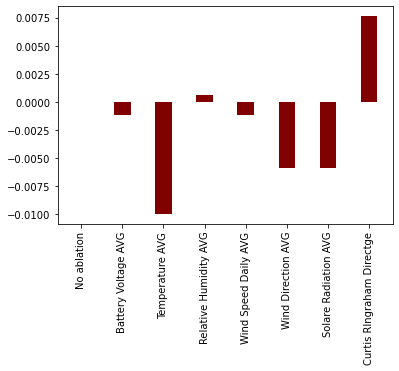

In [42]:
from matplotlib import pyplot as plt

plt.bar(accuracy_drop_log.keys(), accuracy_drop_log.values(), color="maroon", width = 0.4)
plt.xticks(rotation="vertical")

In [43]:
def criteria(l):
    return l[1]

sorted_accs =  sorted(accuracy_drop_log.items(),key=criteria, reverse=True)

print (f"Features are ranked from best to worst (based on how removing them impacts the accuracy of {best_model_name})")
print (f"**************************************")

i=1
for entry in sorted_accs:
    feature_name = entry[0]
    acc_drop = entry[1]
    
    # We do not want to print "No ablation"
    if feature_name != "No ablation":
        print (f"Feature {i}.{feature_name}, drop in acc {acc_drop}")
        i=i+1

Features are ranked from best to worst (based on how removing them impacts the accuracy of grad_boost)
**************************************
Feature 1.Curtis RIngraham Directge, drop in acc 0.007619539043687618
Feature 2.Relative Humidity AVG, drop in acc 0.0005951152390780701
Feature 3.Wind Speed Daily AVG, drop in acc -0.0011695906432749315
Feature 4.Battery Voltage AVG, drop in acc -0.0011764705882353343
Feature 5.Wind Direction AVG, drop in acc -0.005872033023735845
Feature 6.Solare Radiation AVG, drop in acc -0.005875472996216047
Feature 7.Temperature AVG, drop in acc -0.009969040247677974


From here, we can see that the most important feature is "Curtis RIngraham Directge" which stands for all the one-hot encoding features. It seems luike Route and Relative Humidity are the most important features in terms of model performance.  

### 2. MinMax Scaling 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

features = mtrainier_features_minmax_df.to_numpy()
labels = mtrainier_labels_df.to_numpy()

_x, x_test, _y, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

k = 10

# We can use sklearn's cross validation score directly
# We can speed up training using n_jobs parameter which specifies how many cpu_cores to use

best_model_name = ""
best_model_valid_accuracy = 0
best_model = "None"

for model_name in all_models.keys():
    model = all_models[model_name]
    cv_scores = cross_val_score(model,_x,_y.flatten(), cv=k, n_jobs=4)
    average_cv_score = cv_scores.mean()
    print (f"Mean cross validation accuracy for model {model_name} = {average_cv_score}")

    if average_cv_score > best_model_valid_accuracy :
        best_model_name = model_name
        best_model_valid_accuracy  = average_cv_score
        best_model = model

print (f"Best model is {best_model_name} with {k}-fold accuracy of {best_model_valid_accuracy}")

/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Mean cross validation accuracy for model lr = 0.6293257653938769


#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Mean cross validation accuracy for model svm = 0.6087994496044031
Mean cross validation accuracy for model decision_tree = 0.6076332989336085
Mean cross validation accuracy for model random_forest = 0.634031647746818
Mean cross validation accuracy for model grad_boost = 0.63406260749914


/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Mean cross validation accuracy for model voting = 0.6322738218094257
Best model is grad_boost with 10-fold accuracy of 0.63406260749914


/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [46]:
best_model.fit(_x,_y.flatten())

y_pred_test = best_model.predict(x_test)
test_accuracy = accuracy_score(y_pred_test, y_test.flatten())

print (f"Test accuracy for model {test_accuracy}")

GradientBoostingClassifier()

Test accuracy for model 0.6263157894736842


Best model is <mark> grad_boost with 10-fold accuracy of **0.63406260749914** with a test accuracy of **0.6263157894736842** </mark>

###  For MinMax Scaling, we will run feature abalation. 

In [47]:
# Let's run ablation tests on our best model
# You could choose any model to do this test
best_model = GradientBoostingClassifier()

feature_names = mtrainier_features_minmax_df.columns 

# Let's maintain an accuracy dictionary

accuracy_drop_log = {"No ablation":0}

for i in range(len(feature_names)):
    # we are going to drop one feature at a time - which includes the entire one-hot encoding key when we do route
    feature_name = feature_names[i]
    print (f"Removing feature {feature_name}")
    
    #first categorical feature derived from one-hot encoding
    if feature_name != 'Curtis RIngraham Directge': 
        x_ablated = np.delete(_x,i,axis=1) 
        cv_scores = cross_val_score(best_model,x_ablated,_y.flatten(), cv=k, n_jobs=4)
        average_cv_score = cv_scores.mean()
        print (f"Mean cross validation accuracy = {average_cv_score}")
        accuracy_drop_log[feature_name] = best_model_valid_accuracy-average_cv_score
    else: #to represent all the routes 
        x_ablated = np.delete(_x,np.s_[6:28],axis=1)
        cv_scores = cross_val_score(best_model,x_ablated,_y.flatten(), cv=k, n_jobs=4)
        average_cv_score = cv_scores.mean()
        print (f"Mean cross validation accuracy = {average_cv_score}")
        accuracy_drop_log[feature_name] = best_model_valid_accuracy-average_cv_score
        break 
        

Removing feature Battery Voltage AVG
Mean cross validation accuracy = 0.6346508427932577
Removing feature Temperature AVG
Mean cross validation accuracy = 0.6440282077743378
Removing feature Relative Humidity AVG
Mean cross validation accuracy = 0.6340522875816994
Removing feature Wind Speed Daily AVG
Mean cross validation accuracy = 0.63640522875817
Removing feature Wind Direction AVG
Mean cross validation accuracy = 0.6405159958720331
Removing feature Solare Radiation AVG
Mean cross validation accuracy = 0.6399346405228759
Removing feature Curtis RIngraham Directge
Mean cross validation accuracy = 0.6258513931888545


<BarContainer object of 8 artists>

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

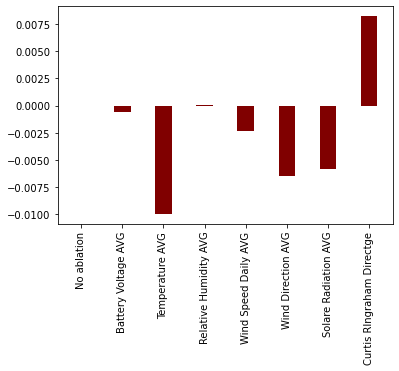

In [48]:
from matplotlib import pyplot as plt

plt.bar(accuracy_drop_log.keys(), accuracy_drop_log.values(), color="maroon", width = 0.4)
plt.xticks(rotation="vertical")

In [49]:
def criteria(l):
    return l[1]

sorted_accs =  sorted(accuracy_drop_log.items(),key=criteria, reverse=True)

print (f"Features are ranked from best to worst (based on how removing them impacts the accuracy of {best_model_name})")
print (f"**************************************")

i=1
for entry in sorted_accs:
    feature_name = entry[0]
    acc_drop = entry[1]
    
    # We do not want to print "No ablation"
    if feature_name != "No ablation":
        print (f"Feature {i}.{feature_name}, drop in acc {acc_drop}")
        i=i+1

Features are ranked from best to worst (based on how removing them impacts the accuracy of grad_boost)
**************************************
Feature 1.Curtis RIngraham Directge, drop in acc 0.008211214310285486
Feature 2.Relative Humidity AVG, drop in acc 1.0319917440604343e-05
Feature 3.Battery Voltage AVG, drop in acc -0.0005882352941176672
Feature 4.Wind Speed Daily AVG, drop in acc -0.0023426212590299533
Feature 5.Solare Radiation AVG, drop in acc -0.005872033023735845
Feature 6.Wind Direction AVG, drop in acc -0.00645338837289311
Feature 7.Temperature AVG, drop in acc -0.009965600275197772


We can see that the most important features are still the same with "Curtis RIngraham Directge" being on top. It is slightly more important in terms of accuracy compared to Standard Scaling. 

### 3. Removing "glacier only - no summit attempt" and "Unknown"

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

features = mtrainier_removed_df.to_numpy()
labels = mtrainier_labels_df.to_numpy()

_x, x_test, _y, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

k = 10

# We can use sklearn's cross validation score directly
# We can speed up training using n_jobs parameter which specifies how many cpu_cores to use

best_model_name = ""
best_model_valid_accuracy = 0
best_model = "None"

for model_name in all_models.keys():
    model = all_models[model_name]
    cv_scores = cross_val_score(model,_x,_y.flatten(), cv=k, n_jobs=4)
    average_cv_score = cv_scores.mean()
    print (f"Mean cross validation accuracy for model {model_name} = {average_cv_score}")

    if average_cv_score > best_model_valid_accuracy :
        best_model_name = model_name
        best_model_valid_accuracy  = average_cv_score
        best_model = model

print (f"Best model is {best_model_name} with {k}-fold accuracy of {best_model_valid_accuracy}")

/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Mean cross validation accuracy for model lr = 0.6299071207430339
Mean cross validation accuracy for model svm = 0.6187616099071207
Mean cross validation accuracy for model decision_tree = 0.6105675954592363
Mean cross validation accuracy for model random_forest = 0.6275851393188854
Mean cross validation accuracy for model grad_boost = 0.6240798073615411


/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Mean cross validation accuracy for model voting = 0.6334330925352598
Best model is voting with 10-fold accuracy of 0.6334330925352598


/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [51]:
best_model.fit(_x,_y.flatten())

y_pred_test = best_model.predict(x_test)
test_accuracy = accuracy_score(y_pred_test, y_test.flatten())

print (f"Test accuracy for model {test_accuracy}")

/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('1', LogisticRegression(penalty='none')),
                             ('2', SVC(kernel='linear')),
                             ('3', DecisionTreeClassifier())])

Test accuracy for model 0.6210526315789474


There is some difference when we remove the two columns "Unknown" and ""glacier only - no summit attempt". The best model is <mark> voting with 10-fold accuracy of **0.6334330925352598** and a test accuracy of **0.6210526315789474** </mark>

### For the removed parts of the dataframe, we will run feature ablation. 

In [56]:
# Let's run ablation tests on our best model
# You could choose any model to do this test
best_model = VotingClassifier(estimators=[("1",lr_vanilla),("2",svm_linear),("3",dt)])

feature_names = mtrainier_removed_df.columns 

# Let's maintain an accuracy dictionary

accuracy_drop_log = {"No ablation":0}

for i in range(len(feature_names)):
    # we are going to drop one feature at a time - which includes the entire one-hot encoding key when we do route
    feature_name = feature_names[i]
    print (f"Removing feature {feature_name}")
    
    #first categorical feature derived from one-hot encoding
    if feature_name != 'Curtis RIngraham Directge': 
        x_ablated = np.delete(_x,i,axis=1) 
        cv_scores = cross_val_score(best_model,x_ablated,_y.flatten(), cv=k, n_jobs=4)
        average_cv_score = cv_scores.mean()
        print (f"Mean cross validation accuracy = {average_cv_score}")
        accuracy_drop_log[feature_name] = best_model_valid_accuracy-average_cv_score
    else: #to represent all the routes 
        x_ablated = np.delete(_x,np.s_[6:26],axis=1)
        cv_scores = cross_val_score(best_model,x_ablated,_y.flatten(), cv=k, n_jobs=4)
        average_cv_score = cv_scores.mean()
        print (f"Mean cross validation accuracy = {average_cv_score}")
        accuracy_drop_log[feature_name] = best_model_valid_accuracy-average_cv_score
        break 
        

Removing feature Battery Voltage AVG


/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Mean cross validation accuracy = 0.6199312005503956
Removing feature Temperature AVG


/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Mean cross validation accuracy = 0.6269797041623667
Removing feature Relative Humidity AVG


/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Mean cross validation accuracy = 0.6340144478844169
Removing feature Wind Speed Daily AVG


/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Mean cross validation accuracy = 0.6351909184726521
Removing feature Wind Direction AVG


/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Mean cross validation accuracy = 0.6322669418644651
Removing feature Solare Radiation AVG


/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wolfpack/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Mean cross validation accuracy = 0.6058789129686962
Removing feature Curtis RIngraham Directge
Mean cross validation accuracy = 0.6240488476092191


<BarContainer object of 8 artists>

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

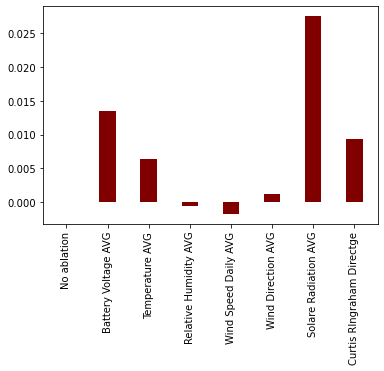

In [57]:
from matplotlib import pyplot as plt

plt.bar(accuracy_drop_log.keys(), accuracy_drop_log.values(), color="maroon", width = 0.4)
plt.xticks(rotation="vertical")

In [58]:
def criteria(l):
    return l[1]

sorted_accs =  sorted(accuracy_drop_log.items(),key=criteria, reverse=True)

print (f"Features are ranked from best to worst (based on how removing them impacts the accuracy of {best_model_name})")
print (f"**************************************")

i=1
for entry in sorted_accs:
    feature_name = entry[0]
    acc_drop = entry[1]
    
    # We do not want to print "No ablation"
    if feature_name != "No ablation":
        print (f"Feature {i}.{feature_name}, drop in acc {acc_drop}")
        i=i+1

Features are ranked from best to worst (based on how removing them impacts the accuracy of voting)
**************************************
Feature 1.Solare Radiation AVG, drop in acc 0.027554179566563586
Feature 2.Battery Voltage AVG, drop in acc 0.013501891984864178
Feature 3.Curtis RIngraham Directge, drop in acc 0.00938424492604073
Feature 4.Temperature AVG, drop in acc 0.00645338837289311
Feature 5.Wind Direction AVG, drop in acc 0.00116615067079473
Feature 6.Relative Humidity AVG, drop in acc -0.0005813553491570422
Feature 7.Wind Speed Daily AVG, drop in acc -0.0017578259373922656


We can see that there is a huge shift in terms of importance features from "Curtis RIngraham Directge" to now Solare Radiation AVG and Battery Voltage AVG having more importance. In fact, most of the drops in features have some substantial affect on accuracy unlike when we kept all of the features from one-hot encoding.  

### 4. Taking away the 'Route' feature entirely before feature ablation

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

features = mtrainier_no_route_df.to_numpy()
labels = mtrainier_labels_df.to_numpy()

_x, x_test, _y, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

k = 10

# We can use sklearn's cross validation score directly
# We can speed up training using n_jobs parameter which specifies how many cpu_cores to use

best_model_name = ""
best_model_valid_accuracy = 0
best_model = "None"

for model_name in all_models.keys():
    model = all_models[model_name]
    cv_scores = cross_val_score(model,_x,_y.flatten(), cv=k, n_jobs=4)
    average_cv_score = cv_scores.mean()
    print (f"Mean cross validation accuracy for model {model_name} = {average_cv_score}")

    if average_cv_score > best_model_valid_accuracy :
        best_model_name = model_name
        best_model_valid_accuracy  = average_cv_score
        best_model = model

print (f"Best model is {best_model_name} with {k}-fold accuracy of {best_model_valid_accuracy}")

Mean cross validation accuracy for model lr = 0.6134571723426212
Mean cross validation accuracy for model svm = 0.618173374613003
Mean cross validation accuracy for model decision_tree = 0.6117853457172342
Mean cross validation accuracy for model random_forest = 0.6223460612315102
Mean cross validation accuracy for model grad_boost = 0.6264396284829722
Mean cross validation accuracy for model voting = 0.6240488476092191
Best model is grad_boost with 10-fold accuracy of 0.6264396284829722


In [61]:
best_model.fit(_x,_y.flatten())

y_pred_test = best_model.predict(x_test)
test_accuracy = accuracy_score(y_pred_test, y_test.flatten())

print (f"Test accuracy for model {test_accuracy}")

GradientBoostingClassifier()

Test accuracy for model 0.631578947368421


The best model is <mark>grad_boost with 10-fold accuracy of **0.6264396284829722** and a test accuracy of **0.631578947368421**</mark>

### For removing 'Route', we will run feature ablation. 

In [63]:
# Let's run ablation tests on our best model
# You could choose any model to do this test
best_model = GradientBoostingClassifier()

feature_names = mtrainier_no_route_df.columns 

# Let's maintain an accuracy dictionary

accuracy_drop_log = {"No ablation":0}

for i in range(len(feature_names)):
    # we are going to drop one feature at a time - which includes the entire one-hot encoding key when we do route
    feature_name = feature_names[i]
    print (f"Removing feature {feature_name}")
    
    #first categorical feature derived from one-hot encoding
    if feature_name != 'Curtis RIngraham Directge': 
        x_ablated = np.delete(_x,i,axis=1) 
        cv_scores = cross_val_score(best_model,x_ablated,_y.flatten(), cv=k, n_jobs=4)
        average_cv_score = cv_scores.mean()
        print (f"Mean cross validation accuracy = {average_cv_score}")
        accuracy_drop_log[feature_name] = best_model_valid_accuracy-average_cv_score
    else: #to represent all the routes 
        x_ablated = np.delete(_x,np.s_[6:26],axis=1)
        cv_scores = cross_val_score(best_model,x_ablated,_y.flatten(), cv=k, n_jobs=4)
        average_cv_score = cv_scores.mean()
        print (f"Mean cross validation accuracy = {average_cv_score}")
        accuracy_drop_log[feature_name] = best_model_valid_accuracy-average_cv_score
        break 
        

Removing feature Battery Voltage AVG
Mean cross validation accuracy = 0.6211558307533539
Removing feature Temperature AVG
Mean cross validation accuracy = 0.6258479532163743
Removing feature Relative Humidity AVG
Mean cross validation accuracy = 0.6240763673890609
Removing feature Wind Speed Daily AVG
Mean cross validation accuracy = 0.6328895768833849
Removing feature Wind Direction AVG
Mean cross validation accuracy = 0.6258513931888545
Removing feature Solare Radiation AVG
Mean cross validation accuracy = 0.6223323013415893


<BarContainer object of 7 artists>

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

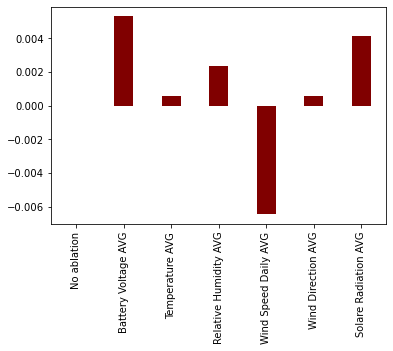

In [64]:
from matplotlib import pyplot as plt

plt.bar(accuracy_drop_log.keys(), accuracy_drop_log.values(), color="maroon", width = 0.4)
plt.xticks(rotation="vertical")

In [65]:
def criteria(l):
    return l[1]

sorted_accs =  sorted(accuracy_drop_log.items(),key=criteria, reverse=True)

print (f"Features are ranked from best to worst (based on how removing them impacts the accuracy of {best_model_name})")
print (f"**************************************")

i=1
for entry in sorted_accs:
    feature_name = entry[0]
    acc_drop = entry[1]
    
    # We do not want to print "No ablation"
    if feature_name != "No ablation":
        print (f"Feature {i}.{feature_name}, drop in acc {acc_drop}")
        i=i+1

Features are ranked from best to worst (based on how removing them impacts the accuracy of grad_boost)
**************************************
Feature 1.Battery Voltage AVG, drop in acc 0.005283797729618289
Feature 2.Solare Radiation AVG, drop in acc 0.004107327141382844
Feature 3.Relative Humidity AVG, drop in acc 0.002363261093911273
Feature 4.Temperature AVG, drop in acc 0.0005916752665978686
Feature 5.Wind Direction AVG, drop in acc 0.0005882352941176672
Feature 6.Wind Speed Daily AVG, drop in acc -0.006449948400412686


We can see that removing 'Route' feature matches up with removing the two features "Unknown" and "glacier only - no summit attempt". The most importance features are now Battery Voltage AVG and Solare Radiation AVG. However, the drops in these features wouldn't really affect accuracy as well compared to removing those two features only. 

## Insights and Analysis

I tried 4 different modifications and ran feature ablation on each model. The four modifications were: Standard Scaling, MinMax Scaling, removing the two features 'Unknowns' and 'glacier - no attempt at summit', and removing route entirely from the dataframe. Overall despite doing all these modifications, most of the models were stagnant in terms of model accuracy with it ranging between 0.62-0.63 for test and validation accuracy. However, the changes in terms of feature importance were interesting since "Route" was the most important feature for MinMax and Standard Scaling. After I removed those two categorical features and kept the other 20 routes, the importance feature of "Route" dropped to third. Battery Voltage AVG and Solare Radiation AVG were both the top features for the last models. I believe that model acccuracy can improve if better data or more features were added.  